# NV Center Fundamentals: Geometry, Electrons, and Symmetry

## Overview
This notebook covers the fundamental building blocks of understanding NV centers:
- **Step 0**: Defect geometry and electron counting
- **Step 1**: Molecular orbital construction from symmetry

These are the essential foundations that every aspect of the NV center energy diagram builds upon.

## Step 0: Know Your Defect and Electron Count

### The Raw Defect Structure

Before drawing any energy levels, we need to understand what we're working with:

| What you learn | Why it matters |
|---|---|
| Exact atomic layout and crystallographic axis | Sets the symmetry label written next to every electronic term |
| Which atoms bring which valence electrons | Lets you count the total electron pool |
| Net charge of the center | Decides how many electrons stay on the defect vs. lattice |

### Atomic Geometry Inside Diamond

#### Building the NV Center Structure

1. **Start from pristine diamond**: $sp^3$-bonded face-centered-cubic (FCC) lattice
2. **Create the defect pair**:
   - Remove one carbon atom → vacancy with three neighboring carbons with dangling $sp^3$ orbitals
   - Substitute adjacent carbon with nitrogen atom (N)
   - N keeps three tetrahedral bonds, fourth points toward vacancy

#### Crystal Structure Visualization

The following interactive 3D visualization shows the atomic structure of the NV center in diamond:

In [34]:
# Import visualization utilities
import sys
sys.path.append('code')  # Add the code directory to path
from nv_visualization_utils import create_nv_center_demo, create_nv_center_full, export_nv_center_to_threejs

from ipywidgets import interactive, Dropdown, VBox, Layout, Button, Output, HBox
import IPython.display as display

# Create the plot
fig = create_nv_center_demo()

# Create export button with styling
export_button = Button(
    description='Export to THREE.js',
    button_style='info',
    tooltip='Export the visualization as THREE.js with transparent background',
    layout=Layout(width='150px')
)

output = Output()

@export_button.on_click
def on_export_click(b):
    with output:
        output.clear_output()
        print("Exporting to THREE.js...")
        html_path = export_nv_center_to_threejs()
        print(f"✓ Exported to: {html_path}")
        print("  Open in browser for transparent background visualization")
        print("  Use Export PNG button in the HTML to save as image")

# Display the plot
fig.show()

# Display the export button and output
display.display(HBox([export_button]))
display.display(output)

Created diamond lattice with 64 atoms
Found 86 bonds between atoms
Created NV center: Nitrogen at index 56, Vacancy at index 57


## Interaction Tips

- **Rotate**: Click and drag to rotate the model
- **Zoom**: Use the mouse wheel or pinch gesture
- **Pan**: Hold Shift while dragging
- **Reset view**: Double-click anywhere in the visualization
- **Hover**: Move your cursor over atoms to see their type
- **Camera Controls**: Use the camera controls in the top-right corner for predefined views
- **Save as Image**: Use the camera icon in the toolbar to save the current view as an image

You can also switch to a full-screen mode using the expand icon in the top-right of the visualization.

#### Symmetry Analysis

Now that we can visualize the structure, let's analyze its symmetry properties:

3. **Identify the symmetry**: The N–V pair plus three equivalent carbons form a trigonal pyramid
   - **Rotation**: 120° about the N→V line
   - **Mirrors**: three $\sigma$ planes through that axis
   - **Point group**: $C_{3v}$

#### Interactive Symmetry Explorer

The following tool allows you to explore the symmetry operations of the NV center:

In [35]:
# Import the symmetry explorer module
import sys
sys.path.append('code')  # Add the code directory to path
from nv_center_symmetry_explorer_fundamentals import create_symmetry_explorer

# Create and display the interactive symmetry explorer
symmetry_explorer = create_symmetry_explorer()

interactive(children=(Dropdown(description='Symmetry Op:', options=('Identity', 'C3 (120°)', 'C3² (240°)', 'σv…

✅ Interactive NV center symmetry explorer is ready!

Use the dropdown menu above to explore different symmetry operations!

The interactive Plotly visualization allows you to:
- Rotate by clicking and dragging
- Zoom with the mouse wheel
- Pan by holding Shift while dragging
- Reset the view by double-clicking


### Counting Electrons: The Famous "Six"

#### Why Six Electrons Matter

This is crucial - if you can't trace these six electrons, nothing else will make sense:

#### Why $\text{NV}^-$ is Special: Comparing Charge States

The NV center can exist in three charge states, but $\text{NV}^-$ is by far the most useful:

| Charge State | Electrons in Gap Orbitals | Ground State | Key Properties |
|--------------|---------------------------|--------------|----------------|
| **$\text{NV}^+$** | 4 electrons | $^1A_1$ (singlet) | • No unpaired electrons → no spin<br>• Optically inactive<br>• No quantum sensing capability |
| **$\text{NV}^0$** | 5 electrons | $^2A_1$ (doublet) | • One unpaired electron<br>• Spin-1/2 system<br>• Shorter coherence times<br>• Less stable under illumination |
| **$\text{NV}^-$** | 6 electrons | $^3A_2$ (triplet) | • **Two unpaired electrons**<br>• **Spin-1 system**<br>• **Long coherence times**<br>• **Bright fluorescence**<br>• **Spin-dependent luminescence** |

#### Why $\text{NV}^-$ Dominates Applications

1. **Perfect Electronic Configuration**: The $e^2$ configuration with Hund's rule gives exactly **two unpaired electrons**
   - Creates a spin-1 ground state (S = 1)
   - Enables rich spin physics and quantum control

2. **Optical Brightness**: Strong absorption and emission in the red/near-IR
   - Efficient single-photon generation
   - Easy detection even from single centers

3. **Spin-Photon Interface**: The excited state structure enables:
   - Optical spin polarization
   - Spin-dependent fluorescence readout
   - All-optical quantum control

4. **Environmental Stability**: Most stable charge state under typical conditions
   - Maintains properties from cryogenic to room temperature
   - Resistant to charge fluctuations

#### Electron Inventory

1. **Nitrogen brings 5 valence electrons**
   - Three form $\sigma$-bonds to surrounding carbons
   - **2 remain** in lone-pair-like orbital toward vacancy

2. **Three vacancy carbons each contribute 1 dangling-bond electron → 3 more**

3. **Extra charge in $\text{NV}^-$**
   - Additional electron captured from lattice
   - Total: 5 + 3 + 1 = 9 electrons around the site
   - But 3 are tied up in $\sigma$ bonds with nitrogen
   - **Only 6 electrons in gap orbitals that matter**

#### The Six-Electron Model Foundation

This "six-electron model" is the foundation of all modern $\text{NV}^-$ descriptions. These six electrons will occupy the molecular orbitals we derive in the next section, leading to the famous **spin-1 triplet ground state** that makes NV centers the premier solid-state quantum system.

## Step 1: Molecular Orbitals from Symmetry

### Goal
Starting from atomic dangling bonds, systematically obtain the three independent single-electron orbitals that will hold our six electrons. As discussed in the symmetry section above, the point group of the NV center is $C_{3v}$.

### A Note on Group Theory

**Don't worry if you're not familiar with group theory!** While we use it here to be rigorous, the key results are:
- The NV center has $C_{3v}$ symmetry (three-fold rotation + mirror planes)
- This symmetry constrains how atomic orbitals can combine
- We get exactly **three molecular orbitals**: two $a_1$ orbitals and one doubly-degenerate $e$ orbital

The mathematical details below show *how* we get this result, but you can focus on the **physical picture** and **final orbital diagram** if preferred.

> **For deeper study**: If you want to learn more about group theory in chemistry and physics, excellent resources include:
> - *Chemical Applications of Group Theory* by F.A. Cotton
> - *Group Theory and Quantum Mechanics* by M. Tinkham  
> - Online: [Group Theory Tutorial](https://www.chem.ucalgary.ca/courses/351/Carey5th/Ch13/ch13-1-4-grouptheory.html) from University of Calgary

### The $C_{3v}$ Character Table

| $C_{3v}$ | E | $2C_3$ | $3\sigma_v$ | Typical basis |
|----------|---|--------|-------------|---------------|
| $A_1$    | 1 | 1      | 1           | z, $x^2+y^2$  |
| $A_2$    | 1 | 1      | -1          | $R_z$         |
| E        | 2 | -1     | 0           | $(x,y)$, $(R_x,R_y)$ |

### Starting Basis: Four Dangling-Bond Orbitals

| Orbital | Atom | Direction |
|---------|------|----------|
| n | N lone-pair $sp^3$ | along +z (toward vacancy) |
| $c_1, c_2, c_3$ | $sp^3$ of each C | tilted ~109° toward vacancy |

### Symmetry-Adapted Linear Combinations (SALCs)

The actual molecular orbitals are formed by taking linear combinations of the atomic orbitals:

| SALC | Mathematical form | Physical picture |
|------|------------------|------------------|
| **$a_1(1)$** | $n + \frac{1}{\sqrt{3}}(c_1+c_2+c_3)$ | In-phase sum; biggest weight on N → **deep core-like** |
| **$a_1(2)$** | $-\frac{1}{\sqrt{3}}n + (c_1+c_2+c_3)$ | Antibonding wrt N; node between N and C → **gap state** |
| **$e_x$** | $c_1 - \frac{1}{2}(c_2+c_3)$ | Pure carbon character |
| **$e_y$** | $\frac{\sqrt{3}}{2}(c_2-c_3)$ | Pure carbon character |

### Energy Ordering

Because nitrogen is more electronegative than carbon:
- **$a_1(1)$** (largest N coefficient) drops deepest (~1-2 eV below valence band)
- **$a_1(2)$** sits higher in the band gap  
- **$e$** orbitals (no N contribution) just above $a_1(2)$, still in gap
- DFT calculations: e-to-$a_1(2)$ splitting ~0.2-0.3 eV

### Orbital Filling Principles: From Atoms to NV Centers

Before we can determine the ground state configuration, we need to understand how electrons fill molecular orbitals. The same principles that govern atomic electron configurations apply here:

#### 1. **Aufbau Principle** (Building-Up Principle)
- **Rule**: Fill orbitals in order of increasing energy
- **Application**: $a_1(1)$ fills first (lowest energy), then $a_1(2)$, then the $e$ orbitals

#### 2. **Pauli Exclusion Principle**
- **Rule**: No two electrons can have identical quantum numbers
- **Practical consequence**: Maximum of **2 electrons per orbital** with **opposite spins**
- **Spin notation**: 
  - ↑ (spin up, $m_s = +\frac{1}{2}$)
  - ↓ (spin down, $m_s = -\frac{1}{2}$)

#### 3. **Hund's Rule** (Maximum Multiplicity Rule)
- **Rule**: When filling degenerate orbitals, place one electron in each orbital first before pairing
- **Reason**: Electron-electron repulsion is minimized when electrons occupy different orbitals
- **Critical for NV centers**: This is why the $e$ orbitals get one electron each (↑↑) rather than one getting two electrons (↑↓) and the other staying empty

#### 4. **Application to NV⁻ Center (6 electrons total)**

| Step | Orbital | Electrons Added | Configuration | Reason |
|------|---------|----------------|---------------|---------|
| 1 | $a_1(1)$ | 2 electrons | $a_1(1)^2$ | Lowest energy, can hold 2 electrons |
| 2 | $a_1(2)$ | 2 electrons | $a_1(1)^2 a_1(2)^2$ | Next lowest energy, can hold 2 electrons |
| 3 | $e_x$ | 1 electron | $a_1(1)^2 a_1(2)^2 e_x^1$ | Hund's rule: fill one e orbital first |
| 4 | $e_y$ | 1 electron | $a_1(1)^2 a_1(2)^2 e_x^1 e_y^1$ | Hund's rule: fill second e orbital |

**Final configuration**: $a_1(1)^2 a_1(2)^2 e^2$ (where $e^2$ means $e_x^1 e_y^1$)

#### 5. **Why This Creates a Spin-1 System**
- The two electrons in $e$ orbitals have **parallel spins** (both ↑) due to Hund's rule
- Total spin: $S = \frac{1}{2} + \frac{1}{2} = 1$ 
- This gives the famous **triplet ground state** ($^3A_2$) that makes NV centers so useful for quantum applications

#### 6. **Alternative Configurations (Higher Energy)**
- **If we violated Hund's rule**: $a_1(1)^2 a_1(2)^2 e_x^2 e_y^0$ → singlet state (S = 0)
- **If we promoted an electron**: $a_1(1)^2 a_1(2)^1 e^3$ → higher energy
- **Nature chooses the lowest energy configuration that obeys all rules**

c:\Users\User\Desktop\QSing\Github\nv-center-notebook\energy_diagram\code\electron_config_visualization.py:78: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown




### Key Results from Step 1:

- Four dangling bonds → $2A_1 \oplus E$ molecular orbitals

- $a_1(1)$: deep, N-dominated (−1.5 eV)

- $a_1(2)$: gap state (+0.9 eV)

- $e$: doubly degenerate, C-dominated (+1.2 eV)

- **Ground configuration**: $a_1(1)^2 a_1(2)^2 e^2$ (following orbital filling rules)

- **Result**: Spin-1 triplet ground state due to two unpaired electrons in $e$ orbitals

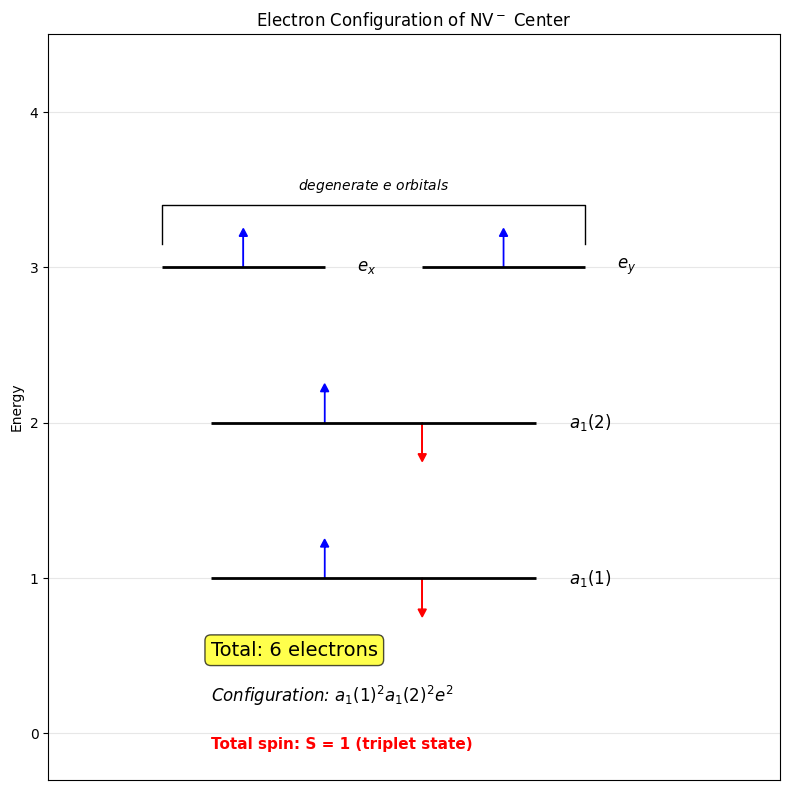

In [36]:
# Import the electron configuration visualization module
import sys
sys.path.append('code')  # Add the code directory to path
from electron_config_visualization import show_electron_configuration

# Create and display the electron configuration diagram
show_electron_configuration()

## Summary and Checkpoint

### What we have established:

1. **Geometry**: $\text{NV}^-$ has $C_{3v}$ symmetry with the z-axis along N→V
2. **Electrons**: Exactly 6 electrons occupy the defect gap orbitals
3. **Molecular orbitals**: Three sets from group theory:
   - $a_1(1)$: deep, doubly occupied
   - $a_1(2)$: gap state, doubly occupied  
   - $e$: doubly degenerate, singly occupied (2 electrons total)
4. **Ground configuration**: $a_1(1)^2 a_1(2)^2 e^2$ (determined by orbital filling rules)
5. **Electronic structure**: Spin-1 triplet ground state ($^3A_2$) due to Hund's rule

### Critical understanding check:

✅ **Electron counting**: Can you trace the six electrons back to their atomic origins?

✅ **Symmetry**: Do you understand why $C_{3v}$ symmetry gives $2A_1 \oplus E$ orbitals?

✅ **Energy ordering**: Can you explain why $a_1(1)$ is deepest and $e$ is highest?

✅ **Spin physics**: How does Hund's rule create the spin-1 ground state that makes NV centers useful?

**Next**: In the next notebook, we'll see how the open $e^2$ shell leads to the famous $^3A_2$ ground state triplet through application of Hund's rules and group theory.

## References and Sources

### Key Scientific Literature

1. **Doherty, M. W. et al.** (2013). *The nitrogen-vacancy colour centre in diamond*. Physics Reports, 528(1), 1-45.
   - Comprehensive review of NV center physics and applications
   - [DOI: 10.1016/j.physrep.2013.02.001](https://doi.org/10.1016/j.physrep.2013.02.001)

2. **Maze, J. R. et al.** (2008). *Properties of nitrogen-vacancy centers in diamond: the group theoretic approach*. New Journal of Physics, 10(4), 045004.
   - Detailed group theory analysis of NV center electronic structure
   - [DOI: 10.1088/1367-2630/10/4/045004](https://doi.org/10.1088/1367-2630/10/4/045004)

3. **Gali, A.** (2019). *Recent advances in the ab initio theory of solid defects*. npj Computational Materials, 5(1), 1-12.
   - Modern computational approaches to defect physics
   - [DOI: 10.1038/s41524-019-0147-y](https://doi.org/10.1038/s41524-019-0147-y)

4. **Manson, N. B. & Harrison, J. P.** (2005). *Photo-ionization of the nitrogen-vacancy center in diamond*. Diamond and Related Materials, 14(10), 1705-1710.
   - Experimental characterization of NV center energy levels
   - [DOI: 10.1016/j.diamond.2005.06.027](https://doi.org/10.1016/j.diamond.2005.06.027)

### Theoretical Background

5. **Tinkham, M.** (1964). *Group Theory and Quantum Mechanics*. McGraw-Hill.
   - Classical reference for group theory applications in solid state physics

6. **Cotton, F. A.** (1990). *Chemical Applications of Group Theory*. 3rd Edition, Wiley.
   - Molecular orbital theory and symmetry-adapted linear combinations

7. **Atkins, P. W. & Friedman, R. S.** (2010). *Molecular Quantum Mechanics*. 5th Edition, Oxford University Press.
   - Term symbols and many-electron configurations

### Computational Resources

8. **Alkauskas, A. et al.** (2014). *First-principles theory of the luminescence lineshape for the triplet transition in diamond NV centres*. New Journal of Physics, 16(7), 073026.
   - Ab initio calculations of NV center properties
   - [DOI: 10.1088/1367-2630/16/7/073026](https://doi.org/10.1088/1367-2630/16/7/073026)

9. **Delaney, P. et al.** (2002). *Identification of the NV center in diamond through its response to electric fields*. Applied Physics Letters, 84(22), 4649-4651.
   - DFT calculations and experimental validation
   - [DOI: 10.1063/1.1759370](https://doi.org/10.1063/1.1759370)

### Educational Resources

10. **Wrachtrup, J. & Jelezko, F.** (2006). *Processing quantum information in diamond*. Journal of Physics: Condensed Matter, 18(21), S807-S824.
    - Pedagogical introduction to NV center physics
    - [DOI: 10.1088/0953-8984/18/21/S08](https://doi.org/10.1088/0953-8984/18/21/S08)

### Online Resources

- **Harvard Quantum Optics Group**: [https://www.physics.harvard.edu/research/quantum-optics](https://www.physics.harvard.edu/research/quantum-optics)
- **MIT Center for Quantum Engineering**: [https://cqe.mit.edu/](https://cqe.mit.edu/)
- **NIST Diamond NV Center Database**: [https://www.nist.gov/pml/sensor-science/quantum-sensors](https://www.nist.gov/pml/sensor-science/quantum-sensors)

### Acknowledgments

This notebook synthesizes knowledge from the broader NV center research community. Special recognition goes to the pioneering work of:
- Neil Manson and John Harrison (Australian National University)
- Jörg Wrachtrup (University of Stuttgart)  
- Mikhail Lukin (Harvard University)
- Ronald Walsworth (formerly Harvard, now University of Maryland)
- Adam Gali (Wigner Research Centre for Physics)